In [ ]:
pip install openpyxl

In [1]:
pip install openpyxl


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\sarat\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [3]:
from sklearn.cluster import KMeans

In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\sarat\appdata\local\programs\python\python311\lib\site-packages (3.9.2)




[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\sarat\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [7]:
file_path = "Untitled Folder/Dataset for vehicle routing and Inv managent.xlsx"  
sheet_data = pd.read_excel("Untitled Folder/Dataset for vehicle routing and Inv managent.xlsx", sheet_name="Sheet1")


In [8]:
locations = sheet_data[["Store_Location", "Demand"]]


In [9]:
locations["Location_Code"] = locations["Store_Location"].astype("category").cat.codes
locations_for_clustering = locations[["Location_Code", "Demand"]].to_numpy()


C:\Users\sarat\AppData\Local\Temp\ipykernel_39608\2956421500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations["Location_Code"] = locations["Store_Location"].astype("category").cat.codes


In [10]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
locations["Cluster"] = kmeans.fit_predict(locations_for_clustering)


C:\Users\sarat\AppData\Local\Temp\ipykernel_39608\1240347677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations["Cluster"] = kmeans.fit_predict(locations_for_clustering)


In [11]:
inventory_data = sheet_data[["Date", "Product_ID", "Demand", "Stock_Level", "Lead_Time"]]


def restocking_suggestions(inventory):
    restock_plan = []


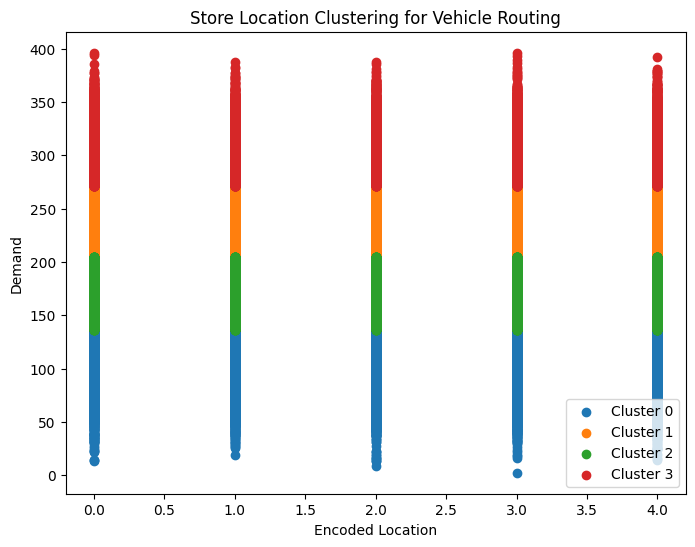

In [12]:
plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    cluster_data = locations[locations["Cluster"] == cluster]
    plt.scatter(cluster_data["Location_Code"], cluster_data["Demand"], label=f"Cluster {cluster}")

plt.title("Store Location Clustering for Vehicle Routing")
plt.xlabel("Encoded Location")
plt.ylabel("Demand")
plt.legend()
plt.show()


In [13]:
def restocking_suggestions(inventory):
    restock_plan = []
    for _, row in inventory.iterrows():
        if row["Stock_Level"] < row["Demand"] * row["Lead_Time"]:
            restock_plan.append({
                "Date": row["Date"],
                "Product_ID": row["Product_ID"],
                "Suggested_Restock": (row["Demand"] * row["Lead_Time"]) - row["Stock_Level"]
            })
    return pd.DataFrame(restock_plan)



In [ ]:
restock_plan = restocking_suggestions(inventory_data)



In [ ]:
print("Restocking Suggestions:")
print(restock_plan.head())